#### **Problem Statement:**
The titanic spaceship was transporting passengers from our solar system to the 3 exo planets. While rounding Alpha Centauri enroute its first destination - Torrid 55 Canciri E, the spaceship collided with a spacetime anomaly hidden in a dust cloud. A similar kind of incident happened 1000 years ago, while the ship remained intact, almost half of the passengers were transported to an alternate dimension.

#### **Task:**
Our task is to predict which of the passengers were transported by the anomaly with the help of the records shown by the spaceship's broken computer system

#### **Evaluation:**
The evaluation will be done based on the classification accuracy, ie the percentage of predicted labels that are correct.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from six.moves import urllib

In [2]:
# Function to fetch the data

download_root = "https://raw.githubusercontent.com/Barsha27/datasets/main/spaceship-titanic/"
spaceship_path = os.path.join("datasets","spaceship")
train_url = download_root + "train.csv"
test_url = download_root + "test.csv"

def fetch_spaceship_data(train_url = train_url, test_url = test_url, spaceship_path = spaceship_path):
    if not os.path.isdir(spaceship_path):
        os.makedirs(spaceship_path)
    train_path = os.path.join(spaceship_path, "train.csv")
    urllib.request.urlretrieve(train_url, train_path)

    test_path = os.path.join(spaceship_path, "test.csv")
    urllib.request.urlretrieve(test_url, test_path)

fetch_spaceship_data()


In [3]:
# Loading the spaceship data

def load_spaceship_data(spaceship_path = spaceship_path):
    csv_path = os.path.join(spaceship_path, "train.csv")
    return pd.read_csv(csv_path)

train = load_spaceship_data()

train.head()
    

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.shape

(8693, 14)

In [5]:
# What are the data types we have

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


- PassengerId, HomePlanet, CryoSleep, Cabin, Destination, VIP, Name are object data types while rest are numerical
- It seems we have missing values in most of the columns

In [6]:
# We should check the percentage of missing values in each column

np.round(train.isna().sum()*100/train.shape[0],2)

PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64

- All of the columns except PassengerId, and Transported columns have less than 5% of values missing in them

<AxesSubplot:>

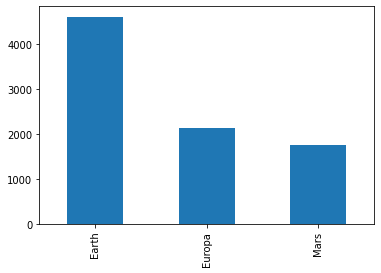

In [8]:
# Lets go ahead and check the various columns and what information they hold - Univariate Analysis

# What is the home planet from which more passengers were taken from?
train["HomePlanet"].value_counts().plot(kind = "bar")

- Maximum passengers are carried from planet Earth

<AxesSubplot:>

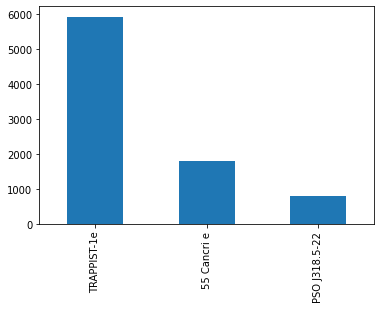

In [10]:
# Where most of the passengers were destined to?
train["Destination"].value_counts().plot(kind = "bar")

- Most of the passengers aprrox. 6k were destined to go to TRAPPIST-1e while near about 2k were destined for 55 Cancri e. 

<AxesSubplot:>

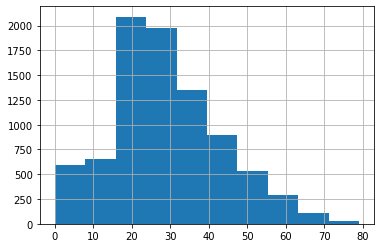

In [16]:
# What are the major age group of people in the spaceship?
train["Age"].hist()

- Most of the passengers were in their 20s. Approx 2k passengers were aged between 20 to 30 years.
- However, ther are very less people with more than 60 years old

<AxesSubplot:>

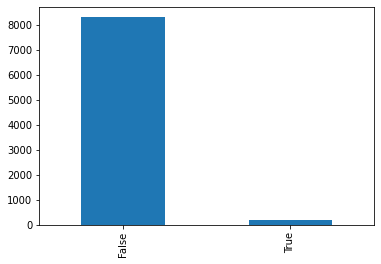

In [18]:
# How many VIPs were there?

train["VIP"].value_counts().plot(kind = "bar")

<AxesSubplot:>

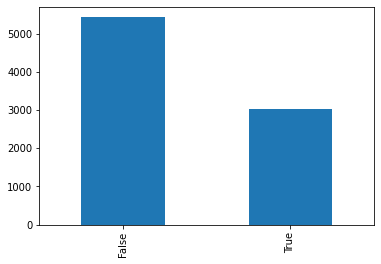

In [20]:
# How many passengers were put to cryosleep?

train["CryoSleep"].value_counts().plot(kind = "bar")

- Almost 3k passengers were put to cryosleep and they were restricted to their own cabins

<AxesSubplot:>

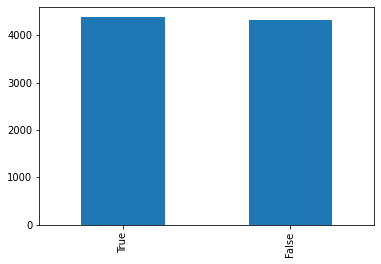

In [22]:
# How many passengers were transported according to the spaceships computer?

train["Transported"].value_counts().plot(kind = "bar")